In [146]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

### Show the dataframe shape.

In [2]:
data=pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.shape

(9134, 24)

### Standardize header names.

In [4]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
cols1 = [col_name.lower().replace(' ', '_') for col_name in data.columns]
cols1

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [6]:
data.columns= cols1
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
data = data.drop(["unnamed:_0"], axis = 1)

KeyError: "['unnamed:_0'] not found in axis"

In [8]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Which columns are numerical?

In [9]:
data.select_dtypes(include=['float64'])

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879
...,...,...
9129,23405.987980,198.234764
9130,3096.511217,379.200000
9131,8163.890428,790.784983
9132,7524.442436,691.200000


### Which columns are categorical?

In [10]:
data.select_dtypes(include=['object'])

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### Check and deal with NaN values.

In [11]:
data.isna().sum().sum()

0

In [12]:
data.dropna()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [13]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date']).dt.to_period('M')
data['effective_to_date']

0       2011-02
1       2011-01
2       2011-02
3       2011-01
4       2011-02
         ...   
9129    2011-02
9130    2011-02
9131    2011-02
9132    2011-02
9133    2011-02
Name: effective_to_date, Length: 9134, dtype: period[M]

In [14]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [15]:
datajan= data.loc[data['effective_to_date'].dt.month == 1]
datajan
  

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9123,WZ45103,California,5678.050167,Yes,Extended,Bachelor,2011-01,Unemployed,F,0,Suburban,Married,76,8,44,0,3,Personal Auto,Personal L2,Offer2,Agent,364.800000,Four-Door Car,Small
9124,CB59349,California,16261.585500,No,Extended,Master,2011-01,Employed,M,60646,Suburban,Married,134,31,42,0,2,Personal Auto,Personal L3,Offer2,Agent,643.200000,SUV,Medsize
9125,RX91025,California,19872.262000,No,Premium,High School or Below,2011-01,Unemployed,M,0,Suburban,Single,185,26,35,0,2,Personal Auto,Personal L3,Offer1,Agent,1950.725547,SUV,Small
9126,AC13887,California,4628.995325,No,Basic,Bachelor,2011-01,Unemployed,M,0,Suburban,Single,67,25,21,0,4,Corporate Auto,Corporate L1,Offer1,Branch,482.400000,Two-Door Car,Medsize


In [16]:
datafeb= data.loc[data['effective_to_date'].dt.month == 2]
datafeb

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [17]:
datamarch= data.loc[data['effective_to_date'].dt.month == 3]
datamarch

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


## EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
### Show DataFrame info
    

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype    
---  ------                         --------------  -----    
 0   customer                       9134 non-null   object   
 1   state                          9134 non-null   object   
 2   customer_lifetime_value        9134 non-null   float64  
 3   response                       9134 non-null   object   
 4   coverage                       9134 non-null   object   
 5   education                      9134 non-null   object   
 6   effective_to_date              9134 non-null   period[M]
 7   employmentstatus               9134 non-null   object   
 8   gender                         9134 non-null   object   
 9   income                         9134 non-null   int64    
 10  location_code                  9134 non-null   object   
 11  marital_status                 9134 non-null   object   
 12  monthly_premium_auto

### Describe DataFrame.

In [19]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Show a plot of the total number of responses.

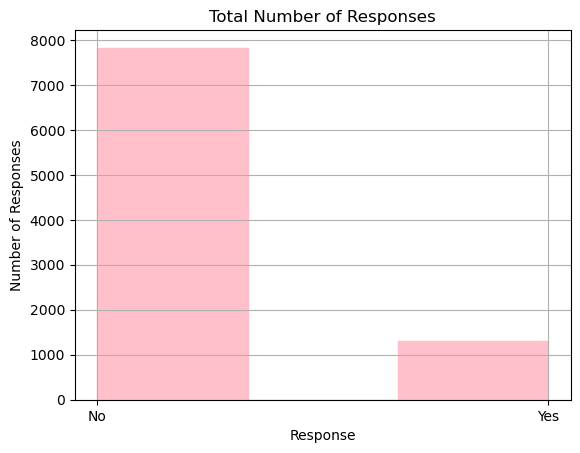

In [20]:
data['response'].hist( bins=3, facecolor='pink',edgecolor='pink')
plt.title('Total Number of Responses')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.show()


### Show a plot of the response rate by the sales channel.

In [21]:
response_sales= data.filter(items= ['response', 'sales_channel'])
print(response_sales)

     response sales_channel
0          No         Agent
1          No         Agent
2          No         Agent
3          No   Call Center
4          No         Agent
...       ...           ...
9129       No           Web
9130      Yes        Branch
9131       No        Branch
9132       No        Branch
9133       No   Call Center

[9134 rows x 2 columns]


In [22]:
response_yes= response_sales.loc[response_sales['response'] == 'Yes']
print(response_yes)

     response sales_channel
5         Yes           Web
6         Yes         Agent
8         Yes         Agent
13        Yes        Branch
22        Yes         Agent
...       ...           ...
9110      Yes         Agent
9119      Yes        Branch
9122      Yes        Branch
9123      Yes         Agent
9130      Yes        Branch

[1308 rows x 2 columns]


In [23]:
response_no=response_sales.loc[response_sales['response']== 'No']
print(response_no)

     response sales_channel
0          No         Agent
1          No         Agent
2          No         Agent
3          No   Call Center
4          No         Agent
...       ...           ...
9128       No        Branch
9129       No           Web
9131       No        Branch
9132       No        Branch
9133       No   Call Center

[7826 rows x 2 columns]


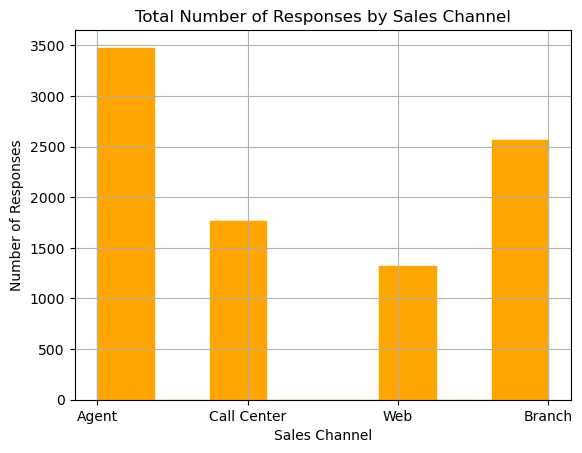

In [24]:
response_sales['sales_channel'].hist(bins= 8, facecolor='orange', edgecolor='orange')
plt.title('Total Number of Responses by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Responses')
plt.show()
                              

Text(0.5, 1.0, 'Total Number of Responses by Sales Channel')

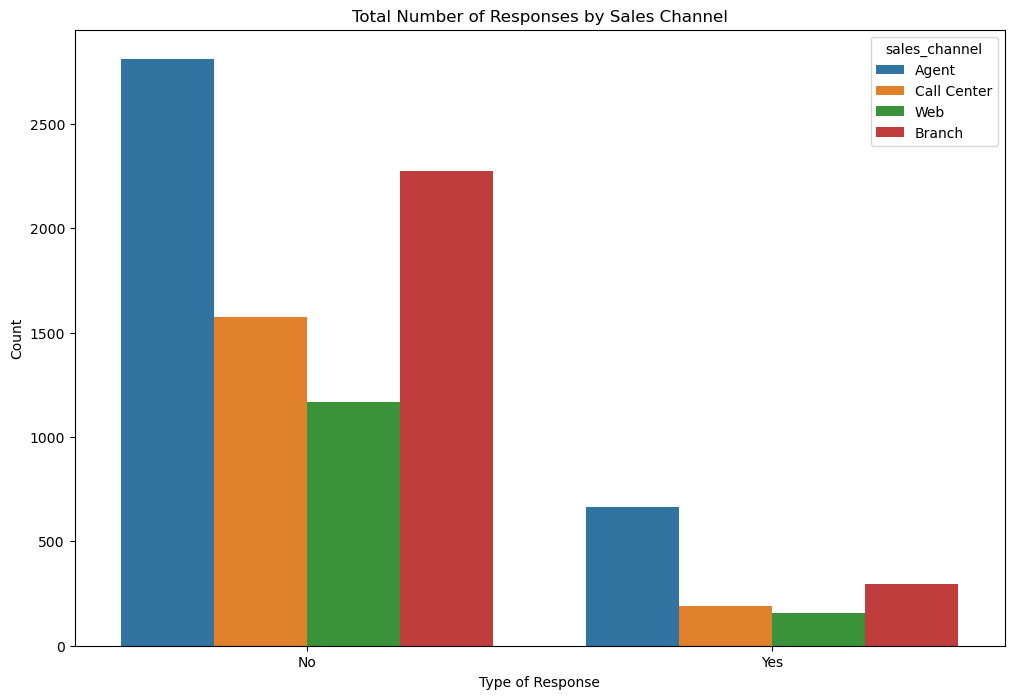

In [25]:
plt.figure(figsize=(12,8))
sns.countplot('response', hue='sales_channel', data=data)
plt.xlabel('Type of Response')
plt.ylabel('Count')
plt.title('Total Number of Responses by Sales Channel')

### Show a plot of the response rate by the total claim amount.

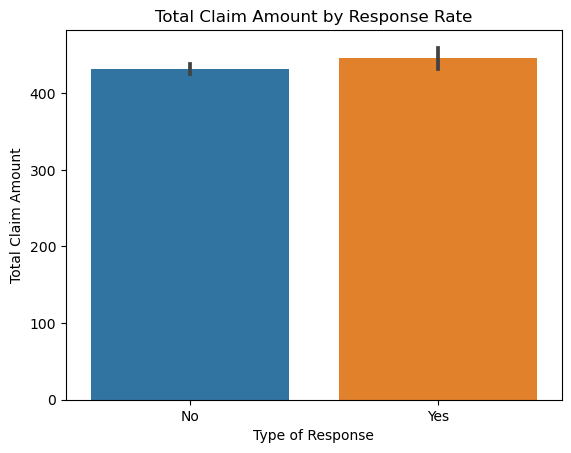

In [26]:
sns.barplot(x='response', y ="total_claim_amount", data = data)
plt.xlabel('Type of Response')
plt.ylabel('Total Claim Amount')
plt.title('Total Claim Amount by Response Rate')
plt.show()


### Show a plot of the response rate by income.

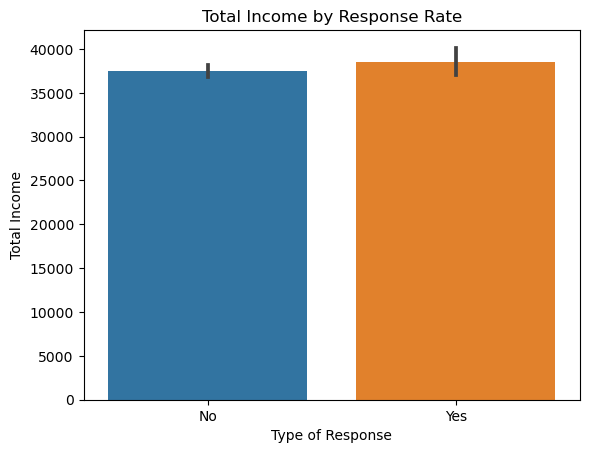

In [27]:
sns.barplot(x='response', y ="income", data = data)
plt.xlabel('Type of Response')
plt.ylabel('Total Income')
plt.title('Total Income by Response Rate')
plt.show()

## Lab | Customer Analysis Round 4

### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [28]:
data.info

<bound method DataFrame.info of      customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  \
0     Bachelor         

In [29]:
data.dtypes

customer                            object
state                               object
customer_lifetime_value            float64
response                            object
coverage                            object
education                           object
effective_to_date                period[M]
employmentstatus                    object
gender                              object
income                               int64
location_code                       object
marital_status                      object
monthly_premium_auto                 int64
months_since_last_claim              int64
months_since_policy_inception        int64
number_of_open_complaints            int64
number_of_policies                   int64
policy_type                         object
policy                              object
renew_offer_type                    object
sales_channel                       object
total_claim_amount                 float64
vehicle_class                       object
vehicle_siz

In [30]:
data_numericals= data.select_dtypes(include=['float'])
data_numericals

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879
...,...,...
9129,23405.987980,198.234764
9130,3096.511217,379.200000
9131,8163.890428,790.784983
9132,7524.442436,691.200000


In [31]:
data_num = data.select_dtypes(include = np.number)
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [32]:
data_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [33]:
data_categoricals= data.select_dtypes(include=['object'])
data_categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [34]:
data_obj = data.select_dtypes(include = np.number)
data_obj

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


## Now we will try to check the normality of the numerical variables visually
### Use seaborn library to construct distribution plots for the numerical variables

## <font color='coral'>Customer Lifetime Value</font>

In [35]:
clf= data['customer_lifetime_value']
clf

##Why is it a float? hundreds of thousands?

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: customer_lifetime_value, Length: 9134, dtype: float64

In [36]:
max(clf)

##to estimate number of bins

83325.38119

<function matplotlib.pyplot.show(close=None, block=None)>

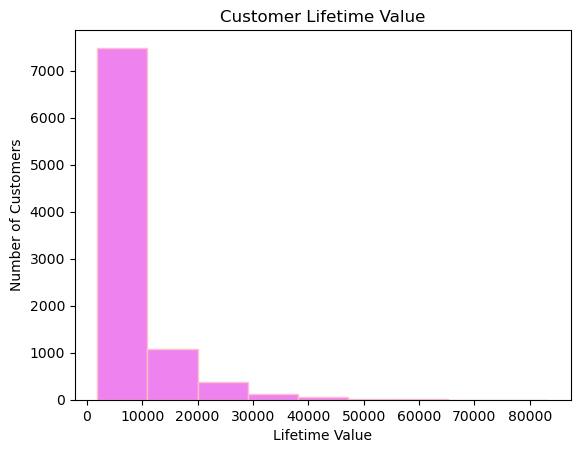

In [37]:
sns.histplot(clf, bins=9 , facecolor='violet', edgecolor= 'pink')
plt.xlabel('Lifetime Value')
plt.ylabel('Number of Customers')
plt.title('Customer Lifetime Value')
plt.show

##plot is skewed to the left, with majority of customers having a lifetime value of less than 10k and a few high net worth individuals


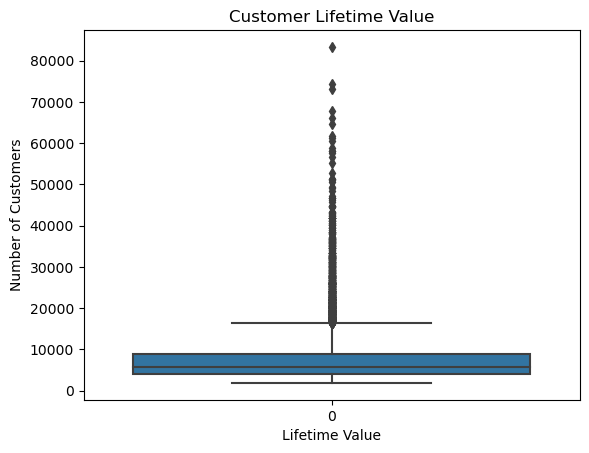

In [38]:
sns.boxplot(data= clf)
plt.xlabel('Lifetime Value')
plt.ylabel('Number of Customers')
plt.title('Customer Lifetime Value')
plt.show()

## boxplot confirms skewness of distribution

## <font color='springgreen'> Months Since Last Claim </font>

In [39]:
months = data['months_since_last_claim']
months

0       32
1       13
2       18
3       18
4       12
        ..
9129    18
9130    14
9131     9
9132    34
9133     3
Name: months_since_last_claim, Length: 9134, dtype: int64

In [40]:
months2=months.dropna()
months2

0       32
1       13
2       18
3       18
4       12
        ..
9129    18
9130    14
9131     9
9132    34
9133     3
Name: months_since_last_claim, Length: 9134, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

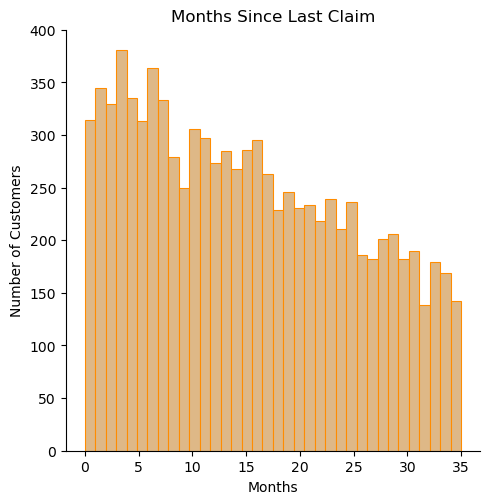

In [41]:
sns.displot(months2, bins=36, facecolor='burlywood', edgecolor='darkorange')
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.title('Months Since Last Claim')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

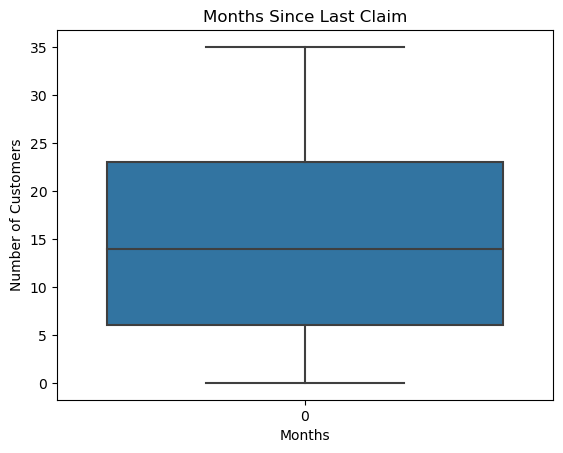

In [42]:
sns.boxplot(data=months2)
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.title('Months Since Last Claim')
plt.show

## <font color='lightpink'>Number of Open Complaints</font>


In [43]:
spillthetea= data['number_of_open_complaints']
spillthetea2= spillthetea.dropna()
spillthetea2

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    0
9131    3
9132    0
9133    0
Name: number_of_open_complaints, Length: 9134, dtype: int64

In [44]:
max(spillthetea2)  ##number of bins, didn't know how many bins to put

5

<function matplotlib.pyplot.show(close=None, block=None)>

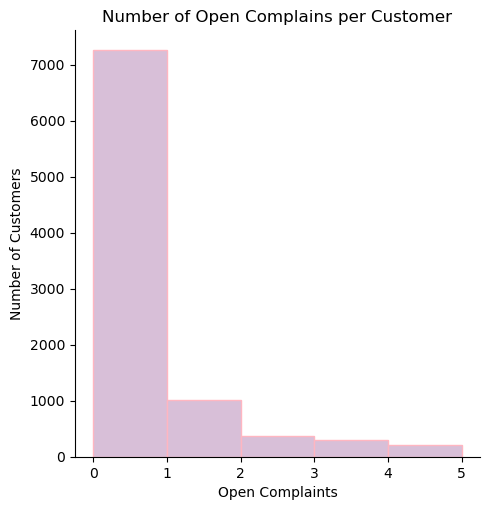

In [45]:
sns.displot(spillthetea2, bins=5, facecolor='thistle', edgecolor='lightpink')
plt.xlabel('Open Complaints')
plt.ylabel('Number of Customers')
plt.title('Number of Open Complains per Customer')
plt.show

##didn't do a boxplot, result turned out funny because it wasn't suited to one

## <font color='slategray'> Total Claim Amount </font>

In [46]:
totalclaimamount= data['total_claim_amount']
totalclaimamount

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

In [47]:
max(totalclaimamount)

2893.239678

<function matplotlib.pyplot.show(close=None, block=None)>

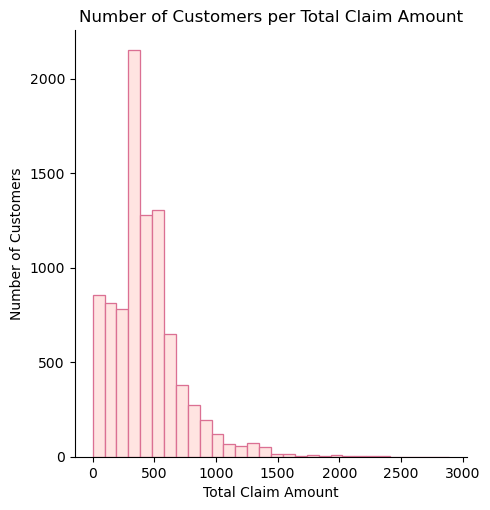

In [48]:
sns.displot(totalclaimamount, bins=30, facecolor='mistyrose', edgecolor='palevioletred')
plt.xlabel('Total Claim Amount')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Total Claim Amount')
plt.show

## most claim amounts are below 500, and claim amounts are most frequently at 300

<function matplotlib.pyplot.show(close=None, block=None)>

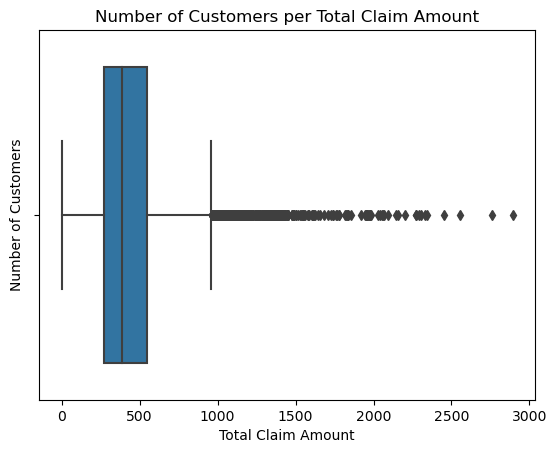

In [49]:
sns.boxplot(totalclaimamount)
plt.xlabel('Total Claim Amount')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Total Claim Amount')
plt.show

##the median claim amount is 300


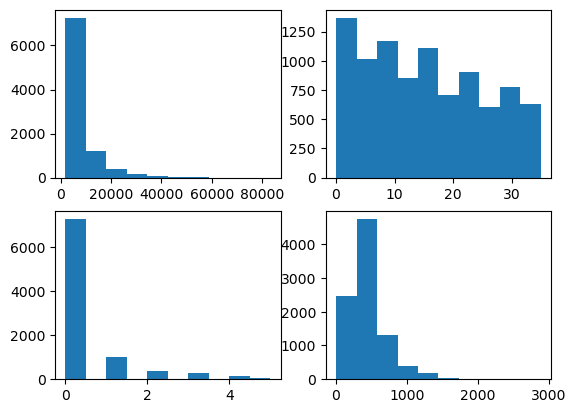

In [50]:
# I can't seem to make subplots using my cleaned dataframes?? (dataframes 'clf', 'months2', 'spillthetea2', and 'totalclaimamount' --see above)

fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(data['customer_lifetime_value'])
axs[0, 1].hist(data['months_since_last_claim'])
axs[1, 0].hist(data['number_of_open_complaints'])
axs[1, 1].hist(data['total_claim_amount'])





plt.show()

##the distribution of all numerical variables are skewed to the left
###how do i adjust the axs numbers?

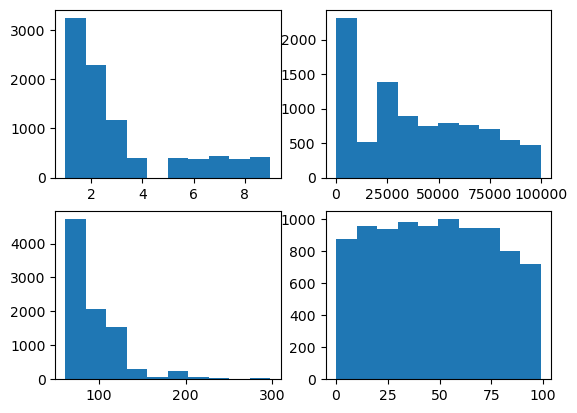

In [51]:
fig, axs = plt.subplots(2, 2)

axs[0, 1].hist(data['income'])
axs[1, 0].hist(data['monthly_premium_auto'])
axs[0, 0].hist(data['number_of_policies'])
axs[1, 1].hist(data['months_since_policy_inception'])

plt.show()

##the distribution of all numerical variables are skewed to the left

## Use Matplotlib to construct histograms

### Customer Lifetime Value

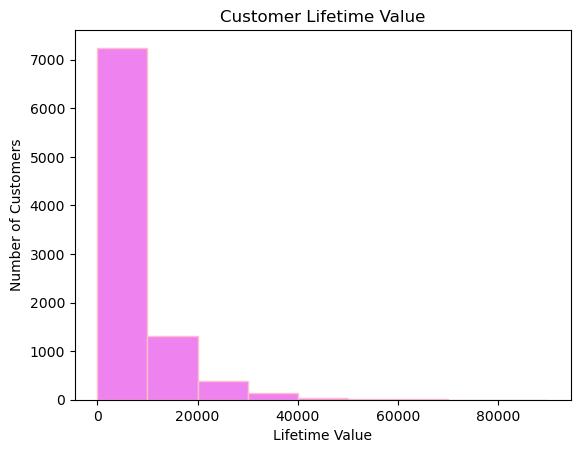

In [52]:
plt.hist(clf, bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000], facecolor='violet', edgecolor= 'pink')
plt.xlabel('Lifetime Value')
plt.ylabel('Number of Customers')
plt.title('Customer Lifetime Value')
plt.show()


### Months Since Last Claim

<function matplotlib.pyplot.show(close=None, block=None)>

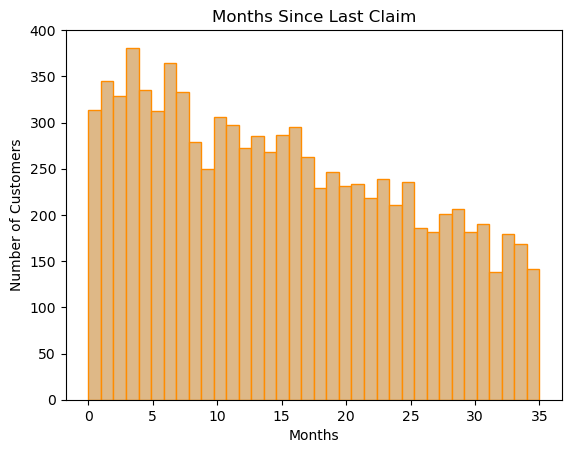

In [53]:
plt.hist(months2, bins=36, facecolor='burlywood', edgecolor='darkorange')
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.title('Months Since Last Claim')
plt.show

### Number of Open Complains

<function matplotlib.pyplot.show(close=None, block=None)>

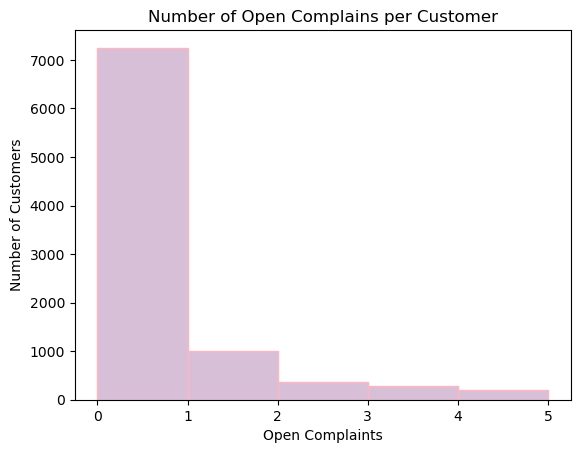

In [54]:
plt.hist(spillthetea2, bins=5, facecolor='thistle', edgecolor='lightpink')
plt.xlabel('Open Complaints')
plt.ylabel('Number of Customers')
plt.title('Number of Open Complains per Customer')
plt.show

### Total Claim Amount

<function matplotlib.pyplot.show(close=None, block=None)>

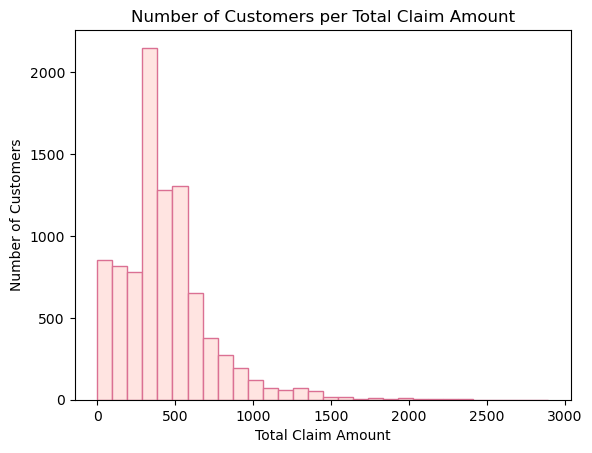

In [55]:
plt.hist(totalclaimamount, bins=30, facecolor='mistyrose', edgecolor='palevioletred')
plt.xlabel('Total Claim Amount')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Total Claim Amount')
plt.show

## Do the distributions for different numerical variables look like a normal distribution?

Answer: No, the distribution all numerical variables are skewed to the left, with the exception of months_since_policy_inception.

## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

## Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [56]:
data_corr= data_num.corr()
data_corr= round(data_corr,2)
data_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

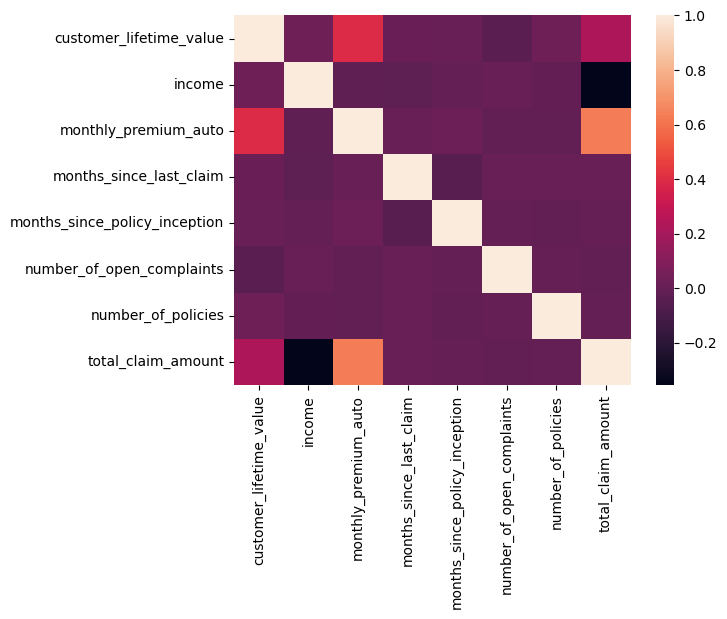

In [57]:
sns.heatmap(data_num.corr())
plt.show

### No, there is no evidence of severe multicollinearity between the independent variables (exc. total_claim_amount, which is the dependent variable). As such, no further action is needed, ie dropping variables

# Lab | Customer Analysis Round 5

## Processing Data
### X-y split.


In [58]:
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)
X.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Normalize (numerical).

In [59]:
transformer = MinMaxScaler().fit(data_num) 
data_minmax = transformer.transform(data_num) 
print(data_minmax.shape)

(9134, 8)


In [60]:
data_minmax

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.        , 0.        ,
        0.13297388],
       [0.06240565, 0.        , 0.13924051, ..., 0.        , 0.875     ,
        0.39105113],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.        , 0.125     ,
        0.19576416],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.6       , 0.125     ,
        0.27329676],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.        , 0.25      ,
        0.2388757 ],
       [0.00876645, 0.        , 0.06751055, ..., 0.        , 0.        ,
        0.12771622]])

In [61]:
datanorm= pd.DataFrame(data_minmax, columns=data_num.columns)
datanorm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


In [62]:
datanorm2= datanorm.dropna()
datanorm2


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

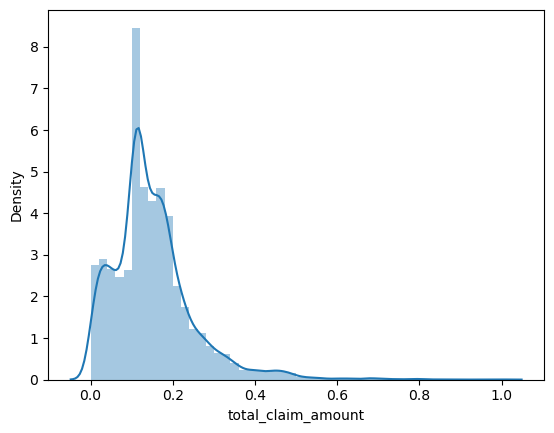

In [63]:
sns.distplot(datanorm2['total_claim_amount'])

## Lab 6
### One Hot/Label Encoding (categorical).

In [64]:
data_categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [87]:
data_categoricals_gender= data_categoricals['gender']
data_categoricals_gender

0       F
1       F
2       F
3       M
4       M
       ..
9129    M
9130    F
9131    M
9132    M
9133    M
Name: gender, Length: 9134, dtype: object

In [118]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data_categoricals[['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status','policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']]).toarray())
encoder_df.columns = encoder.get_feature_names_out()
print(encoder_df)



      state_Arizona  state_California  state_Nevada  state_Oregon  \
0               0.0               0.0           0.0           0.0   
1               1.0               0.0           0.0           0.0   
2               0.0               0.0           1.0           0.0   
3               0.0               1.0           0.0           0.0   
4               0.0               0.0           0.0           0.0   
...             ...               ...           ...           ...   
9129            0.0               1.0           0.0           0.0   
9130            0.0               1.0           0.0           0.0   
9131            0.0               1.0           0.0           0.0   
9132            0.0               1.0           0.0           0.0   
9133            0.0               1.0           0.0           0.0   

      state_Washington  response_No  response_Yes  coverage_Basic  \
0                  1.0          1.0           0.0             1.0   
1                  0.0          1

### Concat DataFrames

In [121]:
concat_data= datanorm2.join(encoder_df)
print(concat_data)

      customer_lifetime_value    income  monthly_premium_auto  \
0                    0.010629  0.562847              0.033755   
1                    0.062406  0.000000              0.139241   
2                    0.134960  0.487763              0.198312   
3                    0.070589  0.000000              0.189873   
4                    0.011245  0.438443              0.050633   
...                       ...       ...                   ...   
9129                 0.264137  0.719547              0.050633   
9130                 0.014719  0.216081              0.075949   
9131                 0.076951  0.000000              0.101266   
9132                 0.069098  0.219452              0.147679   
9133                 0.008766  0.000000              0.067511   

      months_since_last_claim  months_since_policy_inception  \
0                    0.914286                       0.050505   
1                    0.371429                       0.424242   
2                    0.5142

In [122]:
concat_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [123]:
column_names = list(concat_data)
column_names

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount',
 'state_Arizona',
 'state_California',
 'state_Nevada',
 'state_Oregon',
 'state_Washington',
 'response_No',
 'response_Yes',
 'coverage_Basic',
 'coverage_Extended',
 'coverage_Premium',
 'education_Bachelor',
 'education_College',
 'education_Doctor',
 'education_High School or Below',
 'education_Master',
 'employmentstatus_Disabled',
 'employmentstatus_Employed',
 'employmentstatus_Medical Leave',
 'employmentstatus_Retired',
 'employmentstatus_Unemployed',
 'gender_F',
 'gender_M',
 'location_code_Rural',
 'location_code_Suburban',
 'location_code_Urban',
 'marital_status_Divorced',
 'marital_status_Married',
 'marital_status_Single',
 'policy_type_Corporate Auto',
 'policy_type_Personal Auto',
 'policy_type_Special Auto',
 'policy_Corporate L1',
 'policy_Corporate L2',
 'policy_Co

## Linear Regression
### Train-test split.

In [128]:
X= concat_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Apply linear regression.


In [129]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [142]:
len(X)


9134

In [132]:
len(X_train)


6393

In [138]:
len(X_test)

2741

In [134]:

X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
434,0.038280,0.485762,0.291139,0.342857,0.151515,0.0,0.000,0.215648,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4641,0.039929,0.268821,0.295359,0.142857,0.020202,0.0,0.000,0.217307,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4952,0.036927,0.129045,0.329114,0.085714,0.515152,0.0,0.000,0.230580,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1489,0.081208,0.000000,0.253165,0.142857,0.949495,0.0,0.875,0.301092,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
812,0.016954,0.702603,0.092827,0.371429,0.191919,0.2,0.000,0.048978,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [141]:
predictions  = model.predict(X_test)
predictions.shape

(2741,)

In [143]:
predictions

array([218.598065, 447.79344 , 451.2     , ..., 652.8     , 150.878447,
       452.616872])

## Model Validation
### Description:
### R2.
### MSE.
### RMSE.
### MAE.

In [149]:
r2_score(y_test, predictions)

1.0

In [150]:
mean_squared_error(y_test, predictions, squared=False)

1.0494712903829941e-12

In [151]:
mean_squared_error(y_test, predictions)

1.101389989338147e-24

In [152]:
mean_absolute_error(y_test, predictions)

8.402320956639473e-13

## <font color='springgreen'> Just a comment - Mean absolute error was never taught in class! </font>